In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\AYUSHI\Desktop\Flip Robo\Data Trained Projects\Evaluation Projects\Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### As customer ID is unique and an identifier and is not important thus dropping it

In [4]:
at=df.drop("customerID",axis=1)

In [5]:
at.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
at.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### For modelling we need to encode the object data types

In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [8]:
for i in at.columns:
    if at[i].dtypes=="object":
        at[i]=enc.fit_transform(at[i].values.reshape(-1,1))

In [9]:
at

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [10]:
at.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [12]:
at.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

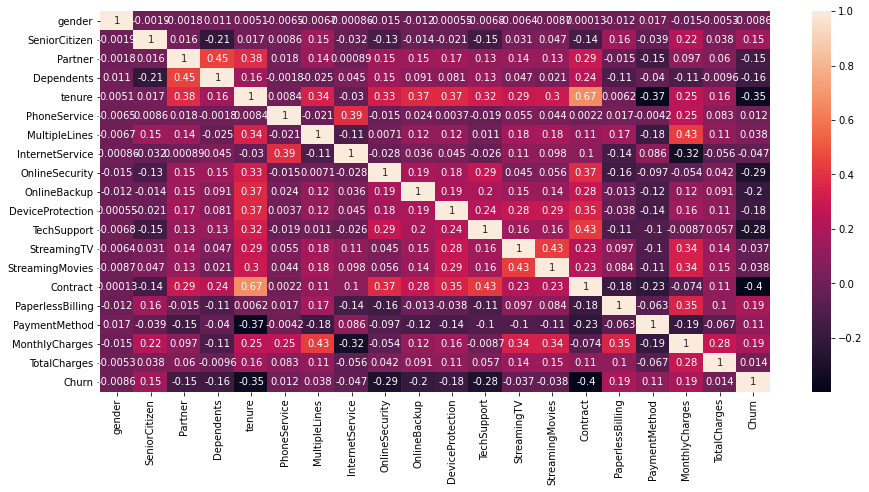

In [14]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(15,7))
sns.heatmap(at.corr(),annot=True)

In [15]:
corr_matrix=at.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

### Through Correlation, we see that the major factors which have positive contribution to Customer Churn are Monthly charges,Paperless billing, Senior Citizen . On the other hand Contract, tenure, Online Security, TechSupport are negatively correlated to Customer Churn

### Now to seperate dependent and independent variables, x and y,

In [16]:
x=at.drop("Churn",axis=1)
y=at["Churn"]

In [17]:
x.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
tenure              0.239540
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
TotalCharges        0.015857
StreamingMovies     0.014657
gender             -0.019031
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

### We see that the data is skewed and to bring the skewness in the range of (-0.5,0.5) using power transform


In [18]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [19]:
type(x_new)

numpy.ndarray

In [20]:
x=pd.DataFrame(x_new,columns=x.columns)

In [21]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.644343,-3.054010,0.334585,-1.252568,-0.977199,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.158541,-0.282548
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,-0.884382
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.937097
3,0.990532,-0.439916,-0.966622,-0.654012,0.646327,-3.054010,0.334585,-1.252568,1.258702,-1.078800,1.163539,1.252625,-1.151526,-1.158239,0.790424,-1.205113,-1.489837,-0.731079,-0.926430
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.249955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.078084,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,0.671510,-0.802598
7039,-1.009559,-0.439916,1.034530,1.529024,1.342198,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.260981,1.207501
7040,-1.009559,-0.439916,1.034530,1.529024,-0.725121,-3.054010,0.334585,-1.252568,1.258702,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.167241,-0.027227
7041,0.990532,2.273159,1.034530,-0.654012,-1.265130,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,0.334312,-0.200089


In [22]:
x.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Dependents          0.875199
Contract            0.302174
OnlineSecurity      0.149362
TechSupport         0.139751
Partner             0.067922
MultipleLines       0.033697
DeviceProtection    0.001051
OnlineBackup       -0.001417
gender             -0.019031
InternetService    -0.072384
StreamingTV        -0.097211
StreamingMovies    -0.105641
PaymentMethod      -0.207559
tenure             -0.243325
MonthlyCharges     -0.259035
TotalCharges       -0.290854
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

In [23]:
sk=x.skew()

In [24]:
sk[np.abs(sk)>0.25].all()

True

### Now we need to check whether outliers are present in the data or not. For that we need to check if the z value of all the factors are exceeding the range (-3,3)

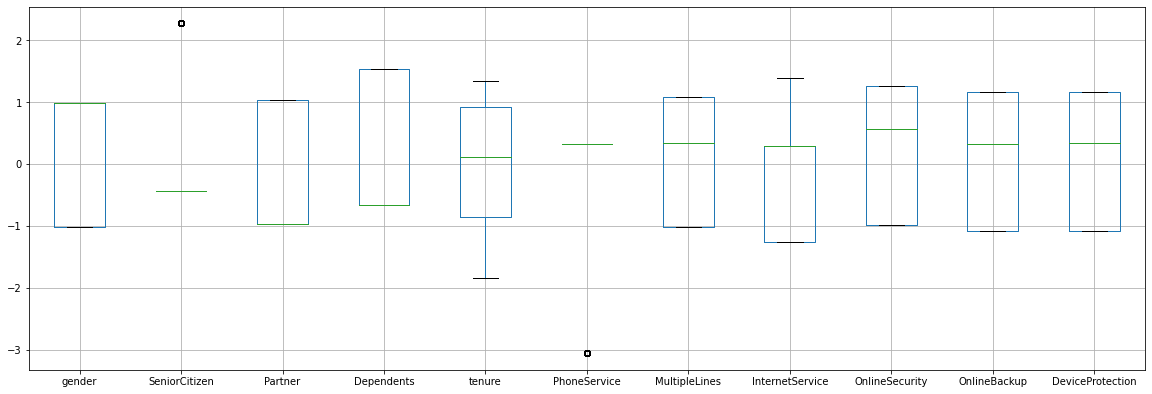

In [25]:
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

### As we see there are no outliers, we can proceed with Modelling

In [26]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.644343,-3.054010,0.334585,-1.252568,-0.977199,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.158541,-0.282548
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,-0.884382
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.937097
3,0.990532,-0.439916,-0.966622,-0.654012,0.646327,-3.054010,0.334585,-1.252568,1.258702,-1.078800,1.163539,1.252625,-1.151526,-1.158239,0.790424,-1.205113,-1.489837,-0.731079,-0.926430
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.249955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.078084,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,0.671510,-0.802598
7039,-1.009559,-0.439916,1.034530,1.529024,1.342198,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.260981,1.207501
7040,-1.009559,-0.439916,1.034530,1.529024,-0.725121,-3.054010,0.334585,-1.252568,1.258702,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.167241,-0.027227
7041,0.990532,2.273159,1.034530,-0.654012,-1.265130,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,0.334312,-0.200089


In [27]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

### To predict the Customer Churning taking place in telecom industry we need to do Logistic regression modelling as the value of Customer Churn is Yes or No which is 0 or 1 thus binary mapping

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [29]:
maxAcc=0
maxRS=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is",maxAcc,"on Random state",maxRS)

Best accuracy is 0.8310858765081618 on Random state 539


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=539)

In [31]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
369,0.990532,-0.439916,1.034530,1.529024,1.342198,0.327438,1.081357,0.290254,1.258702,1.161936,1.163539,1.252625,1.099560,1.094066,1.344386,0.829798,-0.522116,1.559093,1.362934
6053,-1.009559,-0.439916,-0.966622,1.529024,0.586604,0.327438,1.081357,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,1.344386,0.829798,0.409685,-1.324770,-1.962649
5364,0.990532,-0.439916,-0.966622,-0.654012,-0.345103,0.327438,1.081357,0.290254,-0.977199,-1.078800,1.163539,-0.983227,-1.151526,1.094066,-0.888524,0.829798,-0.522116,0.861450,-1.158586
6384,-1.009559,-0.439916,1.034530,-0.654012,-0.788711,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,0.790424,-1.205113,1.318899,-1.502185,-0.928356
6327,0.990532,-0.439916,-0.966622,-0.654012,0.080538,0.327438,-1.015015,0.290254,-0.977199,1.161936,-1.077012,1.252625,1.099560,-1.158239,0.790424,0.829798,-1.489837,0.879110,-0.487718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.990532,2.273159,1.034530,-0.654012,-0.206534,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,1.094066,-0.888524,0.829798,-1.489837,0.024947,-1.489438
3922,0.990532,2.273159,1.034530,-0.654012,1.225749,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,1.099560,1.094066,-0.888524,0.829798,-0.522116,0.988110,0.895527
1168,0.990532,-0.439916,1.034530,1.529024,-1.644343,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,0.790424,-1.205113,1.318899,-1.518295,-0.871126
6268,-1.009559,-0.439916,-0.966622,-0.654012,-0.162696,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,0.790424,-1.205113,-1.489837,-1.475392,0.380604


In [32]:
y_train

369     0.0
6053    0.0
5364    1.0
6384    0.0
6327    0.0
       ... 
277     0.0
3922    0.0
1168    0.0
6268    0.0
2188    0.0
Name: Churn, Length: 5634, dtype: float64

In [33]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2862,0.990532,-0.439916,1.034530,-0.654012,-1.001484,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.169368,0.384375
2895,-1.009559,-0.439916,1.034530,-0.654012,0.397822,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,0.790424,0.829798,-1.489837,-1.511132,1.170675
1652,0.990532,-0.439916,1.034530,-0.654012,-0.393963,-3.054010,0.334585,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,-0.888524,-1.205113,1.318899,-1.001073,0.847903
3467,0.990532,2.273159,-0.966622,-0.654012,-1.169363,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,1.099560,1.094066,-0.888524,0.829798,0.409685,0.883925,0.370220
6761,0.990532,-0.439916,-0.966622,-0.654012,-1.644343,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,-0.888524,0.829798,1.318899,-1.509342,-0.867978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,0.990532,-0.439916,-0.966622,1.529024,0.951632,0.327438,1.081357,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,1.344386,0.829798,1.318899,-1.335340,-1.356759
5733,-1.009559,-0.439916,1.034530,1.529024,1.319271,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,1.344386,-1.205113,-1.489837,-1.511132,-1.508529
2157,0.990532,-0.439916,1.034530,-0.654012,0.817321,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-1.489837,1.375375,0.715101
623,-1.009559,-0.439916,-0.966622,-0.654012,-0.251490,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,1.344386,-1.205113,1.318899,-1.516504,0.209748


In [34]:
y_test

2862    1.0
2895    0.0
1652    0.0
3467    1.0
6761    0.0
       ... 
4127    0.0
5733    0.0
2157    0.0
623     0.0
6521    0.0
Name: Churn, Length: 1409, dtype: float64

In [35]:
x_train.shape

(5634, 19)

In [36]:
y_train.shape

(5634,)

In [37]:
x_test.shape

(1409, 19)

In [38]:
y_test.shape

(1409,)

### Once we have splitted the data into train and test data we can check the accuracy using various classifiers

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test,predlr))
print (classification_report(y_test,predlr))

Accuracy 83.10858765081618
[[975  78]
 [160 196]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      1053
         1.0       0.72      0.55      0.62       356

    accuracy                           0.83      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.82      0.83      0.82      1409



## Decision Tree Classifier 

In [40]:
from sklearn.tree import DecisionTreeClassifier 
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
preddt=DT.predict(x_test)
print ("Accuracy",accuracy_score(y_test, preddt)*100)
print (confusion_matrix(y_test,preddt))
print (classification_report(y_test,preddt))

Accuracy 74.02413058907025
[[853 200]
 [166 190]]
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      1053
         1.0       0.49      0.53      0.51       356

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.75      0.74      0.74      1409



## RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier 
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predrf)*100)
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

Accuracy 81.40525195173882
[[972  81]
 [181 175]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1053
         1.0       0.68      0.49      0.57       356

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



## Support Vector Classifier

In [42]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predsv)*100)
print (confusion_matrix(y_test,predsv))
print (classification_report(y_test,predsv))

Accuracy 81.47622427253371
[[987  66]
 [195 161]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.88      1053
         1.0       0.71      0.45      0.55       356

    accuracy                           0.81      1409
   macro avg       0.77      0.69      0.72      1409
weighted avg       0.80      0.81      0.80      1409



### Here we see that the best model accuracy is given by Logistic Regressionof 83.1% which is very good

## CROSS VALIDATION

In [43]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR, x, y, cv=5)
print("Cross validation score of Logistic Regression Model is",scr1.mean())

Cross validation score of Logistic Regression Model is 0.8039196077166268


In [44]:
scr2=cross_val_score(RF, x, y, cv=5)
print("Cross validation score of Random Forest Classifier is",scr2.mean())

Cross validation score of Random Forest Classifier is 0.791425152429189


In [45]:
scr3=cross_val_score(DT, x, y, cv=5)
print("Cross validation score of Decision Tree Classifier is",scr3.mean())

Cross validation score of Decision Tree Classifier is 0.727671543325376


In [46]:
scr4=cross_val_score(svc, x, y, cv=5)
print("Cross validation score of Support Vector Classifier is",scr4.mean())

Cross validation score of Support Vector Classifier is 0.7966794228659915


### We see that the best accuracy is given by Logistic Regression of 83.1% and cross validation score as 80.39%which is very close or say equal to the model accuracy, thus no overfitting or underfitting is present, we can go with any model. Lets check with Hyper parameter testing

## Hyper Parameter Testing

In [47]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['sqrt','auto','log2'],
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy']}

### For Random Forest Classifier

In [48]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}

In [49]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8183108587650816

In [50]:
from sklearn.model_selection import RandomizedSearchCV

grid_param={'min_samples_leaf':range(1,50,3),
            'min_samples_split':range(2,50,3),
           'max_depth':range(1,50,3),
           'criterion':['gini','entropy'],
           'splitter':['best','random']}

### For DecisionTreeClassifier

In [51]:
RCV=GridSearchCV(DecisionTreeClassifier(),grid_param,cv=5,scoring='accuracy')
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 46,
 'min_samples_split': 2,
 'splitter': 'best'}

In [52]:
RCV_pred=RCV.best_estimator_.predict(x_test)
accuracy_score(y_test,RCV_pred)

0.801277501774308

### For Support Vector Classifier

In [53]:
VC=GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
VC.fit(x_train,y_train)
VC.best_params_

{'C': 1, 'kernel': 'linear'}

In [54]:
VC_pred=VC.best_estimator_.predict(x_test)
accuracy_score(y_test,VC_pred)

0.829666430092264

### For Logistic Regression

In [55]:
LRV=GridSearchCV(LR,param_grid={'C': [0.001,0.01,0.1,1, 10]})
LRV.fit(x_train,y_train)
LRV.best_params_

{'C': 0.01}

In [56]:
LRV_pred=LRV.best_estimator_.predict(x_test)
accuracy_score(y_test,LRV_pred)

0.8268275372604684

### We see that the accuracy of Logistic Regression is almost same 82.6%

### Plotting the AUC curve for all classifiers

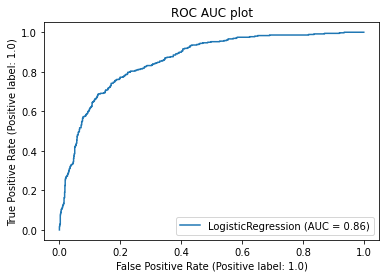

In [57]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LRV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

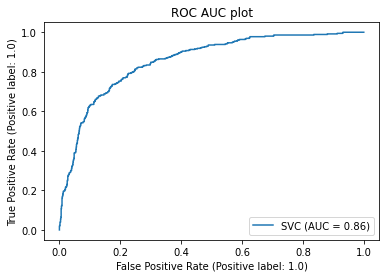

In [58]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(VC.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

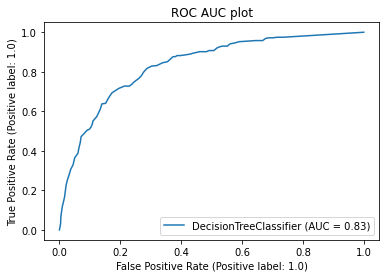

In [60]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

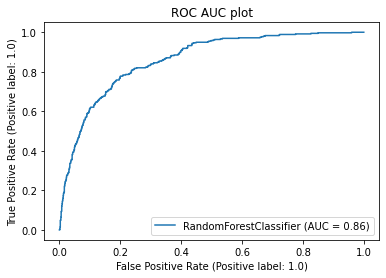

In [61]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

## Through hyper parameter testing the accuracy for the logistric regression model remains the same thus hyper paramater tuning does not affect the model much. Final accuracy is 83% and AUC accuracy is 86% using the Logistic Regression Model

In [62]:
import joblib
joblib.dump(LRV.best_estimator_,"Telecom_Churn")

['Telecom_Churn']

# Thus through this model we will be able to test whether the customer will leave doing business with the company  or not with 83% accuracy, thus this is a very good model which will help the Telecom companies to retain customers as acquiring a new customer is much more expensive than retaining the existing one. Also, as this model will tell which factors are the most responsible for customer churning, it will help to give better customer service to the customers